In [1]:
from src.datasets import read_data
import pandas as pd
train_pd = read_data("train.csv")
test_pd = read_data("test.csv")
all_pd = pd.concat([train_pd, test_pd], axis=0)
all_pd.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,ThirdSsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [2]:
from src.preprocess import find_list_category_columns
is_category = find_list_category_columns(train_pd)
cat = [col for col in is_category.index if is_category[col]]
quant = [col for col in is_category.index if not is_category[col]]

### Calculate mean and mode

In [3]:
mean_value = pd.Series([all_pd[col].mean() for col in quant], index = quant)
mode_value = pd.Series([all_pd[col].value_counts().index[0] for col in cat], index = cat)

In [4]:
corr_matrix = train_pd[quant].corr()
corr_columns = sorted([(col, corr_matrix.loc[col, 'SalePrice']) for col in corr_matrix.index if corr_matrix.loc[col, 'SalePrice'] >= 0.5], key = lambda x : -x[1])
best_corr_cols = [x[0] for x in corr_columns]
new_corr = corr_matrix.loc[best_corr_cols, best_corr_cols]
new_corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,FirstFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
SalePrice,1.00,0.79,0.71,0.64,0.62,0.61,0.61,0.56,0.53,0.52,0.51
OverallQual,0.79,1.00,0.59,0.60,0.56,0.54,0.48,0.55,0.43,0.57,0.55
GrLivArea,0.71,0.59,1.00,0.47,0.47,0.45,0.57,0.63,0.83,0.20,0.29
GarageCars,0.64,0.60,0.47,1.00,0.88,0.43,0.44,0.47,0.36,0.54,0.42
GarageArea,0.62,0.56,0.47,0.88,1.00,0.49,0.49,0.41,0.34,0.48,0.37
TotalBsmtSF,0.61,0.54,0.45,0.43,0.49,1.00,0.82,0.32,0.29,0.39,0.29
FirstFlrSF,0.61,0.48,0.57,0.44,0.49,0.82,1.00,0.38,0.41,0.28,0.24
FullBath,0.56,0.55,0.63,0.47,0.41,0.32,0.38,1.00,0.55,0.47,0.44
TotRmsAbvGrd,0.53,0.43,0.83,0.36,0.34,0.29,0.41,0.55,1.00,0.10,0.19
YearBuilt,0.52,0.57,0.20,0.54,0.48,0.39,0.28,0.47,0.10,1.00,0.59


### Plot for OveralQual, GrLivArea

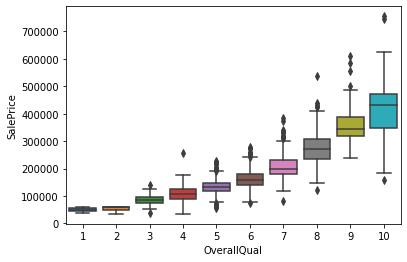

In [5]:
import seaborn as sns
sns.boxplot(x='OverallQual', y='SalePrice', data = train_pd)

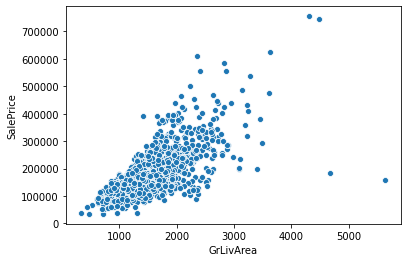

In [6]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_pd)

In [7]:
null_pd = all_pd.isnull().sum()
null_pd[null_pd > 0]

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64

In [8]:
garage_cols = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']
garage_cols_2 = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']

In [9]:
all_pd[all_pd['GarageCars'].isnull()][garage_cols]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
Id,,,,,,,
2577,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
tmp_any = all_pd[garage_cols_2].isnull().any(axis=1)
tmp_all = all_pd[garage_cols_2].isnull().all(axis=1)
wrong = tmp_any ^ tmp_all
all_pd.loc[wrong[wrong].index][garage_cols]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
Id,,,,,,,
2127,Detchd,NaN,NaN,1.0,360.0,NaN,NaN
2577,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


## Impute

### Garage 

In [11]:
import numpy as np
all_pd.loc[2577, 'GarageType'] = np.NaN
all_pd.loc[2577, 'GarageCars'] = all_pd.loc[2577, 'GarageArea'] = 0
all_pd.loc[2577][garage_cols]

GarageType      NaN
GarageYrBlt     NaN
GarageFinish    NaN
GarageCars        0
GarageArea        0
GarageQual      NaN
GarageCond      NaN
Name: 2577, dtype: object

In [12]:
all_pd.loc[2127, 'GarageFinish'] = mode_value['GarageFinish']
all_pd.loc[2127, 'GarageQual'] = mode_value['GarageQual']
all_pd.loc[2127, 'GarageCond'] = mode_value['GarageCond']
all_pd.loc[2127, 'GarageYrBlt'] = all_pd.loc[2127, 'YearBuilt']
all_pd.loc[2127][garage_cols]

GarageType      Detchd
GarageYrBlt       1910
GarageFinish       Unf
GarageCars           1
GarageArea         360
GarageQual          TA
GarageCond          TA
Name: 2127, dtype: object

### GarageYrBlt

In [13]:
all_pd['GarageYrBlt'] = all_pd.apply(lambda row: row['YearBuilt'] if np.isnan(row['GarageYrBlt']) else row['GarageYrBlt'], axis=1)

In [14]:
fill_value = pd.Series(['NoGarage']*4, index = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'])
all_pd = all_pd.fillna(fill_value)

### Make ordinal

In [15]:
garage_finish_map = {'NoGarage': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}
garage_qual_map = {'NoGarage': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}

In [16]:
all_pd.replace({'GarageFinish': garage_finish_map}, inplace=True)
all_pd.replace({'GarageQual': garage_qual_map, 'GarageCond': garage_qual_map}, inplace=True)

### Bsmt impute

In [17]:
bsmt_cols1 = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"] 
bsmt_cols2 = ["BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath"] 

In [18]:
any_null = all_pd[bsmt_cols1].isnull().any(axis=1)
all_null = all_pd[bsmt_cols1].isnull().all(axis=1)
wrong = any_null ^ all_null
wrong[wrong].index

Int64Index([333, 949, 1488, 2041, 2186, 2218, 2219, 2349, 2525], dtype='int64', name='Id')

In [19]:
all_pd.loc[333, 'BsmtFinType2'] = mode_value['BsmtFinType2']
all_pd.loc[[949, 1488, 2349], 'BsmtExposure'] = mode_value['BsmtExposure']
all_pd.loc[[2041, 2186, 2525], 'BsmtCond'] = mode_value['BsmtCond']
all_pd.loc[[2218, 2219], 'BsmtQual'] = mode_value['BsmtQual']


In [20]:
fill_value = pd.Series(['NoBsmt']*5, index=bsmt_cols1)
all_pd = all_pd.fillna(fill_value)

### Make Ordinal

In [21]:
bsmt_qual_map = {'NoBsmt': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}
bsmt_cond_map = {'NoBsmt': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4}
bsmt_exposure_map = {'NoBsmt': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}
bsmt_fintype_map = {'NoBsmt': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}


In [22]:
all_pd.replace({'BsmtQual': bsmt_qual_map, 'BsmtCond': bsmt_cond_map, 'BsmtExposure': bsmt_exposure_map,
                'BsmtFinType1': bsmt_fintype_map, 'BsmtFinType2': bsmt_fintype_map}, inplace=True)

### Other bsmt variables

In [23]:
all_pd[bsmt_cols2] = all_pd[bsmt_cols2].fillna(0)

### Pool variable


In [24]:
all_pd['PoolQC'] = all_pd['PoolQC'].fillna('NoPool')

In [25]:
poolqc_map = {'NoPool': 0, 'Fa':1, 'TA': 2, 'Gd': 3, 'Ex': 4}
all_pd.replace({'PoolQC': poolqc_map}, inplace=True)

In [26]:
all_pd[all_pd['PoolArea'] > 0][['PoolQC', 'PoolArea', 'OverallQual']]

,PoolQC,PoolArea,OverallQual
Id,,,
198,4,512,8
811,1,648,6
1171,3,576,6
1183,4,555,10
1299,3,480,10
1387,1,519,7
1424,3,738,6
1975,4,144,10
2421,0,368,4


In [27]:
all_pd.loc[2421, 'PoolQC'] = 2
all_pd.loc[2504, 'PoolQC'] = 3
all_pd.loc[2600, 'PoolQC'] = 2

### FireplaceQu

In [28]:
all_pd['FireplaceQu'] = all_pd['FireplaceQu'].fillna('None')

In [29]:
all_pd['FireplaceQu'].value_counts()

None    1420
Gd       744
TA       592
Fa        74
Po        46
Ex        43
Name: FireplaceQu, dtype: int64

In [30]:
fireplace_map = {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
all_pd.replace({'FireplaceQu': fireplace_map}, inplace=True)

### LotFrontage

In [31]:
median_lotfrontage = all_pd.groupby('Neighborhood')['LotFrontage'].median()

In [32]:
all_pd['LotFrontage'] = all_pd.apply(lambda row: median_lotfrontage[row['Neighborhood']] 
                                    if np.isnan(row['LotFrontage']) else row['LotFrontage'], axis=1)

#### Make ordinal LotShape

In [33]:
lotshape_map = {'Reg': 0, 'IR1': 1, 'IR2': 2, 'IR3': 3}
all_pd = all_pd.replace({'LotShape': lotshape_map})

### MasBVnr

In [34]:
all_pd[all_pd['MasVnrType'].isnull() ^ all_pd['MasVnrArea'].isnull()][['MasVnrType', 'MasVnrArea']]

,MasVnrType,MasVnrArea
Id,,
2611,NaN,198.0


In [35]:
all_pd.loc[2611, 'MasVnrType'] = all_pd['MasVnrType'].value_counts().index[1]

In [36]:
all_pd = all_pd.fillna({'MasVnrType': 'None', 'MasVnrArea': 0})

In [37]:
masvnrtype_map = {'None': 0, 'BrkCmn': 0, 'BrkFace': 1, 'Stone': 2}
all_pd = all_pd.replace({'MasVnrType': masvnrtype_map})

### Exterior

In [38]:
all_pd['Exterior1st'] = all_pd['Exterior1st'].fillna(mode_value['Exterior1st'])
all_pd['Exterior2nd'] = all_pd['Exterior2nd'].fillna(mode_value['Exterior2nd'])

In [39]:
exter_map = {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}
all_pd = all_pd.replace({'ExterQual': exter_map})
all_pd = all_pd.replace({'ExterCond': exter_map})

### Other variables

In [40]:
all_pd['MiscFeature'] = all_pd['MiscFeature'].fillna('None')
all_pd['Alley'] = all_pd['Alley'].fillna('None')
all_pd['Fence'] = all_pd['Fence'].fillna('None')

In [41]:
all_pd['MSZoning'] = all_pd['MSZoning'].fillna(mode_value['MSZoning'])
all_pd['KitchenQual'] = all_pd['KitchenQual'].fillna(mode_value['KitchenQual'])
all_pd['Electrical'] = all_pd['Electrical'].fillna(mode_value['Electrical'])
all_pd['SaleType'] = all_pd['SaleType'].fillna(mode_value['SaleType'])

In [42]:
kitchenqual_map = {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}
all_pd = all_pd.replace({'KitchenQual': kitchenqual_map})

In [43]:
all_pd['Utilities'] = all_pd['Utilities'].fillna(mode_value['Utilities'])

In [44]:
all_pd['Functional'] = all_pd['Functional'].fillna(mode_value['Functional'])
functional_map = {'Sal': 0, 'Sev': 1, 'Maj2': 2, 'Maj1': 3, 'Mod': 4, 'Min2': 5, 'Min1': 6, 'Typ': 7}
all_pd = all_pd.replace({'Functional': functional_map})

In [45]:
heatingqc_map = {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}
all_pd['HeatingQC'] = all_pd.replace({'HeatingQC': heatingqc_map})

In [46]:
pavedrive_map = {'N': 0, 'P': 1, 'Y': 2}
all_pd['PavedDrive'] = all_pd.replace({'PavedDrive': pavedrive_map})

# Feature Enginerring

In [47]:
new_trainpd = all_pd[:1460]

### Total number of bathrooms

In [48]:
all_pd['TotBathrooms'] = all_pd['FullBath'] + 0.5 * all_pd['HalfBath'] + all_pd['BsmtFullBath'] + 0.5 * all_pd['BsmtHalfBath']

In [49]:
all_pd.loc[:1460][['TotBathrooms', 'SalePrice']].corr()

,TotBathrooms,SalePrice
TotBathrooms,1.000000,0.631731
SalePrice,0.631731,1.000000


### House Age, Remodeled, IsNew


In [50]:
all_pd['HouseAge'] = all_pd['YrSold'] - all_pd['YearBuilt']
all_pd['Remodeled'] = all_pd.apply(lambda row: 1 if row['YearBuilt'] != row['YearRemodAdd'] else 0, axis=1)
all_pd['IsNew'] = all_pd.apply(lambda row: 1 if row['YearBuilt'] == row['YrSold'] else 0, axis=1)

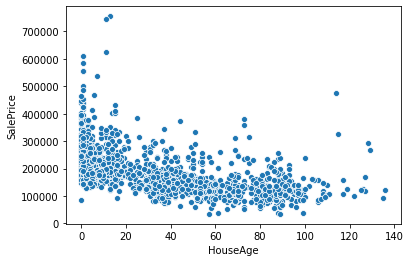

In [51]:
sns.scatterplot(x='HouseAge',y='SalePrice', data=all_pd.loc[:1460])

In [52]:
all_pd.loc[:1460][['HouseAge', 'SalePrice']].corr()

,HouseAge,SalePrice
HouseAge,1.00000,-0.52335
SalePrice,-0.52335,1.00000


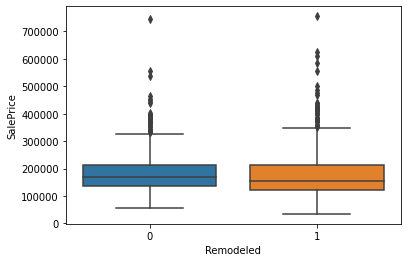

In [53]:
sns.boxplot(x='Remodeled', y ='SalePrice', data=all_pd.loc[:1460])

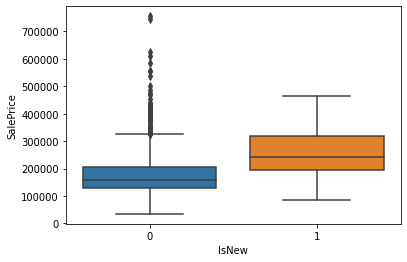

In [54]:
sns.boxplot(x='IsNew', y ='SalePrice', data=all_pd.loc[:1460])

### Bin Neighborhood

In [55]:
median_price_neighbor = pd.DataFrame(new_trainpd.groupby('Neighborhood')['SalePrice'].median().sort_values()).reset_index()

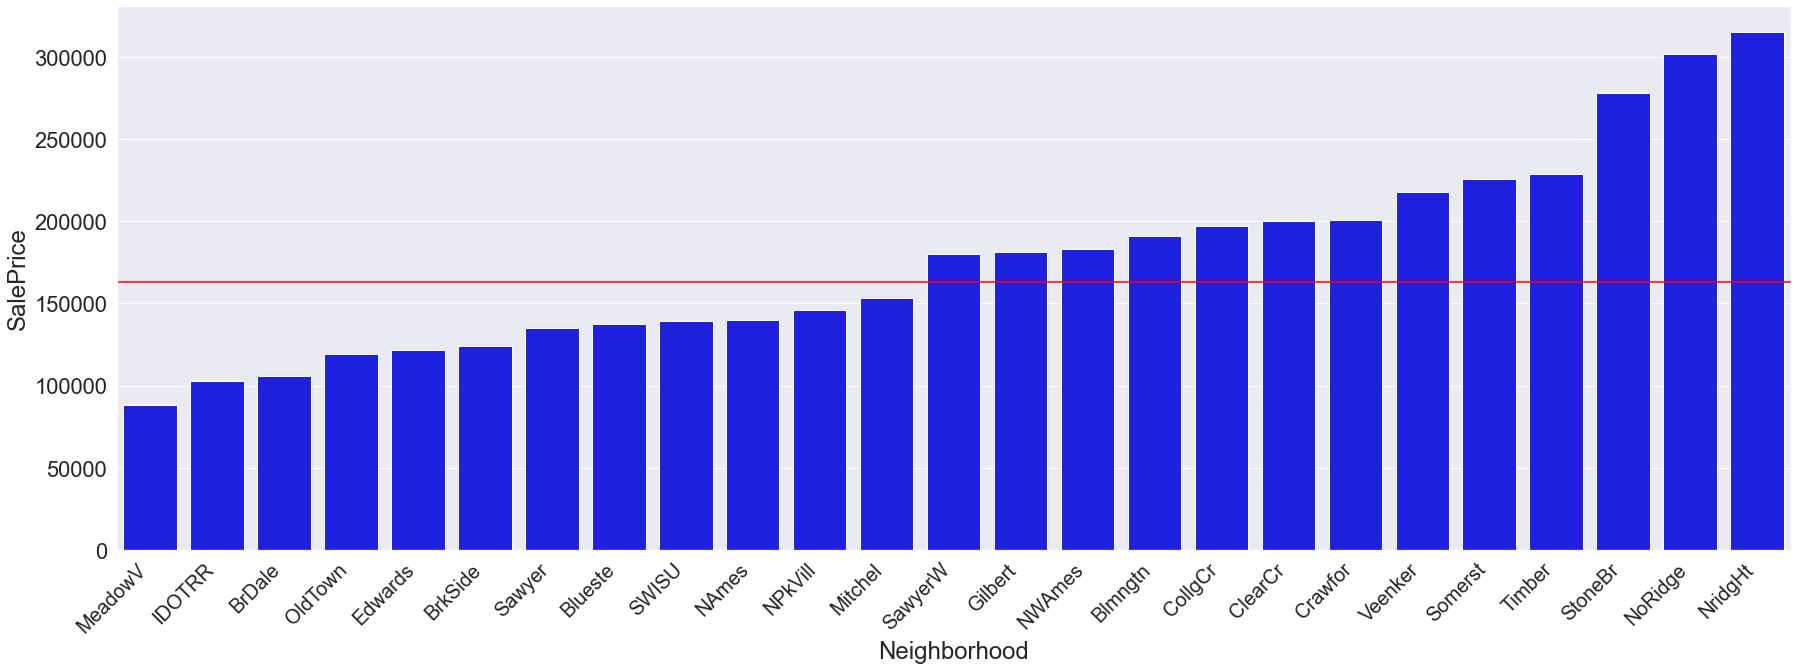

In [56]:
from matplotlib import pyplot
sns.set(font_scale=2) 
fig, ax = pyplot.subplots(figsize=(30, 10))
chart = sns.barplot(x='Neighborhood', y = 'SalePrice', data=median_price_neighbor, color="blue")
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize=20
)
chart.axhline(new_trainpd['SalePrice'].median(), color='red')

In [57]:
rich_neigh = ['StoneBr', 'NoRidge', 'NridgHt']
poor_neigh = ['MeadowV', 'IDOTRR', 'BrDale'] 

In [58]:
all_pd['NeighRich'] = all_pd.apply(lambda row: 2 if row['Neighborhood'] in rich_neigh else 
                                              (0 if row['Neighborhood'] in poor_neigh else 1), axis=1)

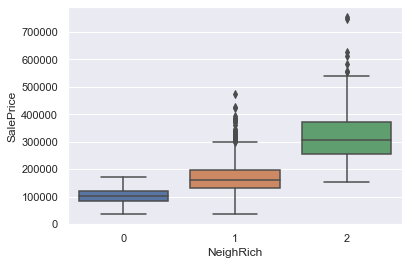

In [59]:
sns.set()
sns.boxplot(x='NeighRich', y='SalePrice', data=all_pd.loc[:1460])

In [60]:
### Add Yes-No variables

In [61]:
all_pd['Haspool'] = all_pd['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
all_pd['Has2ndfloor'] = all_pd['SecondFlrSF'].apply(lambda x: 1 if x > 0 else 0)
all_pd['Hasgarage'] = all_pd['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
all_pd['Hasbsmt'] = all_pd['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
all_pd['Hasfireplace'] = all_pd['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

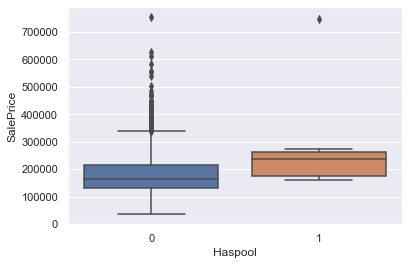

In [62]:
sns.boxplot(x='Haspool', y='SalePrice',data=all_pd[:1460])

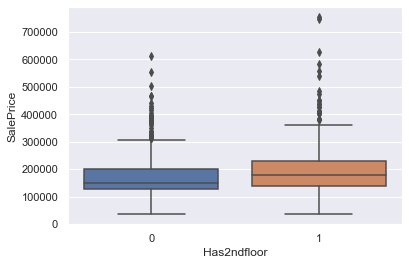

In [63]:
sns.boxplot(x='Has2ndfloor', y='SalePrice',data=all_pd[:1460])

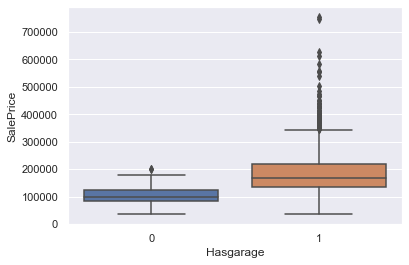

In [64]:
sns.boxplot(x='Hasgarage', y='SalePrice',data=all_pd[:1460])

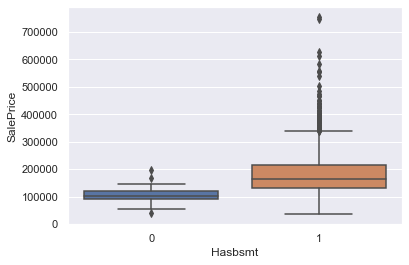

In [65]:
sns.boxplot(x='Hasbsmt', y='SalePrice',data=all_pd[:1460])

In [ ]:
sns.boxplot(x='Hasfireplace', y='SalePrice',data=all_pd[:1460])

### TotalSqFeet

In [62]:
all_pd['TotalSqFeet'] = all_pd['GrLivArea'] + all_pd['TotalBsmtSF']

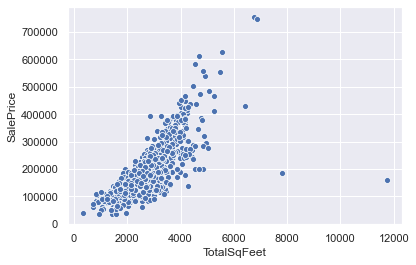

In [63]:
sns.scatterplot(x='TotalSqFeet', y='SalePrice', data=all_pd.loc[:1460])

In [64]:
all_pd[['TotalSqFeet', 'GrLivArea', 'TotalBsmtSF', 'SalePrice']].loc[:1460].corr()

,TotalSqFeet,GrLivArea,TotalBsmtSF,SalePrice
TotalSqFeet,1.000000,0.880324,0.822888,0.778959
GrLivArea,0.880324,1.000000,0.454868,0.708624
TotalBsmtSF,0.822888,0.454868,1.000000,0.613581
SalePrice,0.778959,0.708624,0.613581,1.000000


### Porchs

In [65]:
all_pd['TotalPorchSF'] = all_pd['OpenPorchSF'] + all_pd['EnclosedPorch'] \
                       + all_pd['ThirdSsnPorch'] + all_pd['ScreenPorch']

In [66]:
all_pd.to_csv("../outputs/EDA_data.csv") 


In [67]:
len(all_pd.columns)

92

# Prepare for modelling

## Drop highly correlated

In [68]:
old_is_category = is_category
is_category = pd.Series([True] * len(all_pd.columns), index=all_pd.columns)
is_category.loc[old_is_category[old_is_category == False].index] = False
new_category = ['MSSubClass', 'MoSold', 'YrSold', 'OverallQual', 'OverallCond']
new_quant = ['TotBathrooms', 'HouseAge', 'TotalSqFeet', 'TotalPorchSF', ]
is_category.loc[new_category] = True
is_category.loc[new_quant] = False

In [69]:
category = list(is_category[is_category].index)
quant = list(is_category[is_category==False].index)

In [70]:
corr_quant = all_pd.loc[:1460][quant].corr()

In [71]:
for col1 in corr_quant.columns:
    for col2 in corr_quant.columns:
        if col1 == col2 or col1 == 'SalePrice' or col2 == 'SalePrice':
            continue
        if corr_quant.loc[col1, col2] > 0.8:
            print(f"{col1}:  {corr_quant.loc[col1, 'SalePrice']}  and {col2}:   {corr_quant.loc[col2, 'SalePrice']}")

YearBuilt:  0.5228973328794967  and GarageYrBlt:   0.5080432871615157
TotalBsmtSF:  0.6135805515591944  and FirstFlrSF:   0.6058521846919166
TotalBsmtSF:  0.6135805515591944  and TotalSqFeet:   0.7789588289942269
FirstFlrSF:  0.6058521846919166  and TotalBsmtSF:   0.6135805515591944
GrLivArea:  0.7086244776126511  and TotRmsAbvGrd:   0.5337231555820238
GrLivArea:  0.7086244776126511  and TotalSqFeet:   0.7789588289942269
TotRmsAbvGrd:  0.5337231555820238  and GrLivArea:   0.7086244776126511
GarageYrBlt:  0.5080432871615157  and YearBuilt:   0.5228973328794967
GarageCars:  0.640409197258349  and GarageArea:   0.6234314389183598
GarageArea:  0.6234314389183598  and GarageCars:   0.640409197258349
TotalSqFeet:  0.7789588289942269  and TotalBsmtSF:   0.6135805515591944
TotalSqFeet:  0.7789588289942269  and GrLivArea:   0.7086244776126511


In [72]:
correlated_cols = ['GarageYrBlt', 'GarageArea', 'TotalBsmtSF', 'TotRmsAbvGrd']

In [73]:
for col in correlated_cols:
    quant.remove(col) 
quant.remove('SalePrice')

In [74]:
all_pd = all_pd.drop(correlated_cols, axis=1)

## Drop columns with dominate values

In [75]:
X = all_pd.loc[:1460]
max_ratio_cat = 0.97
remove_categorys = []
for col in category:
    if (X[col].value_counts().iloc[0] / X.shape[0]) > max_ratio_cat:
        remove_categorys.append(col)

In [76]:
remove_categorys

['Street',
 'Utilities',
 'Condition2',
 'RoofMatl',
 'Heating',
 'PoolQC',
 'Haspool',
 'Hasbsmt']

In [77]:
for col in remove_categorys:
    category.remove(col)

In [78]:
all_pd = all_pd.drop(remove_categorys, axis=1)

## Remove outliver

In [79]:
all_pd[all_pd['GrLivArea'] > 4000][['GrLivArea', 'SalePrice']]

,GrLivArea,SalePrice
Id,,
524,4676,184750.0
692,4316,755000.0
1183,4476,745000.0
1299,5642,160000.0
2550,5095,NaN


In [80]:
outliers = [524, 1299]
all_pd = all_pd.drop(outliers)

## Scale quant columns

In [81]:
from scipy.stats import skew

In [82]:
for col in quant:
    if abs(skew(all_pd[col])) > 0.8:
        print(f"{col} ------{skew(all_pd[col])}")
        all_pd[col] = np.log1p(all_pd[col])
        print(f"After skew: {skew(all_pd[col])}")

LotFrontage ------1.1027641596960216
After skew: -1.0688657005663162
LotArea ------13.109494693204892
After skew: -0.5326457124687093
MasVnrArea ------2.6217193014070594
After skew: 0.538454299570571
BsmtFinSF1 ------0.9806445893799994
After skew: -0.6164909745064221
BsmtFinSF2 ------4.144503359887865
After skew: 2.461259370788269
BsmtUnfSF ------0.9196882128670462
After skew: -2.154141950697556
FirstFlrSF ------1.2572859769147167
After skew: 0.030358176026866697
SecondFlrSF ------0.8615555232785529
After skew: 0.3066281842793695
LowQualFinSF ------12.084538795372454
After skew: 8.554639154118071
GrLivArea ------1.0687503898153496
After skew: -0.02205102199368057
BsmtHalfBath ------3.9299959692889805
After skew: 3.773207852775839
KitchenAbvGr ------4.300550114103007
After skew: 3.518883160679614
WoodDeckSF ------1.8447916278085972
After skew: 0.1595229862313794
OpenPorchSF ------2.5293582026396404
After skew: -0.04153806962373557
EnclosedPorch ------4.002344092034257
After skew: 1.9599

In [83]:
# from sklearn.preprocessing import scale
# for col in quant:
#     all_pd[col] = scale(all_pd[col])

In [84]:
from sklearn.preprocessing import RobustScaler
scale = RobustScaler()
all_pd[quant] = scale.fit_transform(all_pd[quant])

## Get dummies

In [85]:
len(category)

48

In [86]:
all_pd = pd.get_dummies(all_pd, drop_first=True)

In [87]:
all_pd.shape

(2917, 217)

## Aplly models

### Cv and rmsle

In [87]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X, y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)

In [88]:
from sklearn.linear_model import LassoCV
alphas2 = np.arange(0.001, 0.1, 0.0005)
lasso = LassoCV(max_iter=1e7, alphas=alphas2, random_state=0, cv=kfolds)

### Train set

In [90]:
predictors = list(all_pd.columns)
predictors.remove('SalePrice')
X = all_pd.loc[:1460][predictors]
y = all_pd.loc[:1460]['SalePrice']

In [91]:
skew(y)

1.8793604459195012

#### Make response variable normal

In [92]:
y = np.log1p(y)

In [93]:
skew(y)

0.12145464268184525

### Test cv

In [94]:
lasso.fit(X, y)

LassoCV(alphas=array([0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035, 0.004 , 0.0045,
       0.005 , 0.0055, 0.006 , 0.0065, 0.007 , 0.0075, 0.008 , 0.0085,
       0.009 , 0.0095, 0.01  , 0.0105, 0.011 , 0.0115, 0.012 , 0.0125,
       0.013 , 0.0135, 0.014 , 0.0145, 0.015 , 0.0155, 0.016 , 0.0165,
       0.017 , 0.0175, 0.018 , 0.0185, 0.019 , 0.0195, 0.02  , 0.0205,
       0.021 , 0.0215, 0.022 , 0.0225, 0.023 , 0.0235, 0.024 , 0.0245,
       0.025 , 0.0255, 0.026...
       0.089 , 0.0895, 0.09  , 0.0905, 0.091 , 0.0915, 0.092 , 0.0925,
       0.093 , 0.0935, 0.094 , 0.0945, 0.095 , 0.0955, 0.096 , 0.0965,
       0.097 , 0.0975, 0.098 , 0.0985, 0.099 , 0.0995]),
        copy_X=True, cv=KFold(n_splits=10, random_state=42, shuffle=True),
        eps=0.001, fit_intercept=True, max_iter=10000000.0, n_alphas=100,
        n_jobs=None, normalize=False, positive=False, precompute='auto',
        random_state=0, selection='cyclic', tol=0.0001, verbose=False)

In [100]:
coef = pd.Series(lasso.coef_,index=predictors)
coef[coef > 0].index

Index(['LotArea', 'LotShape', 'OverallQual', 'OverallCond', 'YearRemodAdd',
       'MasVnrType', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'FirstFlrSF', 'GrLivArea', 'HalfBath', 'KitchenQual',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageFinish', 'GarageCars',
       'GarageQual', 'WoodDeckSF', 'EnclosedPorch', 'ThirdSsnPorch',
       'ScreenPorch', 'PoolArea', 'TotBathrooms', 'NeighRich', 'TotalSqFeet',
       'LotConfig_CulDSac', 'Neighborhood_BrkSide', 'Neighborhood_Crawfor',
       'Neighborhood_Somerst', 'Condition1_Norm', 'RoofStyle_Hip',
       'Exterior1st_BrkFace', 'Exterior1st_CemntBd', 'Exterior1st_MetalSd',
       'Foundation_PConc', 'CentralAir_Y', 'GarageType_Detchd', 'SaleType_New',
       'SaleCondition_Normal'],
      dtype='object')

In [96]:
cv_rmse(lasso, X, y).mean()

0.11251014998327943

In [97]:
rmsle(y, lasso.predict(X))

0.10705908212663504

### Predict

In [127]:
test = all_pd.loc[1461:, predictors]
result_predict = pd.Series(np.exp(lasso.predict(test)), index=all_pd.loc[1461:].index, name='SalePrice')
pd.DataFrame(result_predict).to_csv("../outputs/new_eda_lasso.csv", index=True)